In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#loading the train and test data
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
# Removing features with > 50% missing values
df.isnull().sum() / df.shape[1]


LotFrontage              0.0
OverallQual              0.0
YearBuilt                0.0
YearRemodAdd             0.0
MasVnrArea               0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 329, dtype: float64

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359


In [4]:
# removing features that has <+-0.3 correlation coefficient from SalePrice


In [5]:
# fillna


In [6]:
# encoding categorical features
df=pd.get_dummies(df,columns=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
                              "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl",
                              "Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                              "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir",
                              "Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt","GarageFinish",
                              "GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"],
                  prefix=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood",
                          "Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                          "MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                          "BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional",
                          "FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive",
                          "SaleType","SaleCondition"],drop_first=True)

In [7]:
# Convert dataframe into X and y numpy array
# arr.values

In [8]:
# sc_X=StandardScaler()
# scX fit and transform

In [9]:
# add columns of ones to X

In [10]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter in a linear regression model
    """
    return 0

In [11]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        pass
    
    return theta, J_history

In [12]:
# Run gradient descent
theta, J_history = gradientDescent(X_train,y_train.reshape(m,1),theta,0.01,400)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

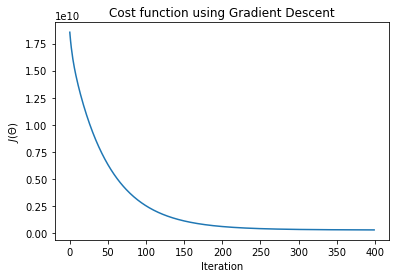

In [13]:
# visualize the cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [14]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(x,theta)
    
    return predictions

In [15]:
#feature normalisation of X_test values
X_test= sc_X.fit_transform(X_test)
X_test=np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)
predict=predict(X_test,theta)

In [17]:
# export as csv
np.savetxt("submission.csv",predict,fmt="%.1f")

In [18]:
pd.read_csv('submission.csv')

,96302.7
0,152629.5
1,181034.3
2,193078.7
3,197755.1
4,165960.1
...,...
1453,75628.3
1454,73309.8
1455,166061.7
1456,116180.9
